<a href="https://colab.research.google.com/github/Sejalhere/reactjs/blob/main/TRUST_AND_ML_PLANKISTON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the new dataset
df = pd.read_csv("parkinsons_disease_data.csv")  # Update path if needed

# Display first few rows
df.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [2]:
# Get general info about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Display column names
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [3]:
# Check unique values in the gender column
if 'Gender' in df.columns:
    print(df['Gender'].value_counts())
else:
    print("No Gender column found.")


Gender
0    1068
1    1037
Name: count, dtype: int64


# Check unique values in target column
df['status'].value_counts()  # Adjust if the target column name is different



In [4]:
df['Diagnosis'].value_counts()  # Adjust if the target column name is different


,count
Diagnosis,
1,1304
0,801


In [5]:
# Check if there is any description of Gender coding
df[['Gender', 'Diagnosis']].groupby('Gender').count()


,Diagnosis
Gender,
0,1068
1,1037


In [6]:
df[['Gender', 'Age', 'Diagnosis']].head(10)  # Show first 10 rows


,Gender,Age,Diagnosis
0,0,85,0
1,0,75,1
2,1,70,1
3,0,52,1
4,0,87,0
5,1,68,0
6,1,78,0
7,1,70,1
8,0,80,1
9,0,71,0


In [7]:
# Convert Gender column to categorical labels
df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})

# Verify changes
df[['Gender', 'Diagnosis']].head(10)


,Gender,Diagnosis
0,Male,0
1,Male,1
2,Female,1
3,Male,1
4,Male,0
5,Female,0
6,Female,0
7,Female,1
8,Male,1
9,Male,0


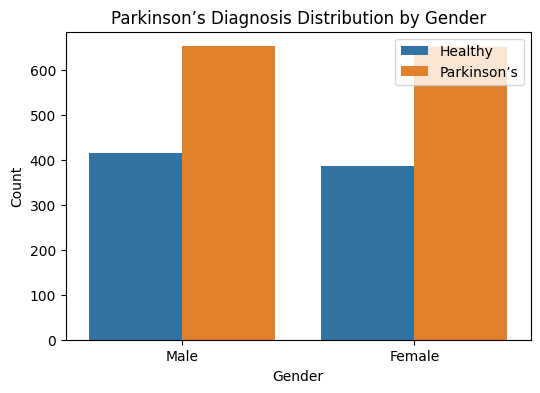

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Diagnosis by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Diagnosis", data=df)
plt.title("Parkinson’s Diagnosis Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Healthy", "Parkinson’s"])
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(columns=["PatientID", "DoctorInCharge", "Diagnosis"])  # Remove irrelevant columns
y = df["Diagnosis"]  # Target variable (0 = Healthy, 1 = Parkinson’s)

# Convert categorical 'Gender' into numerical (Male = 0, Female = 1)
X["Gender"] = X["Gender"].map({"Male": 0, "Female": 1})

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# New Section

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))

# Show detailed performance report
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.8052256532066508
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.74       160
           1       0.83      0.86      0.85       261

    accuracy                           0.81       421
   macro avg       0.80      0.79      0.79       421
weighted avg       0.80      0.81      0.80       421



Accuracy = 80.5% → The model performs well overall.
✅ Precision & Recall:

Class 0 (Healthy) → Precision: 76%, Recall: 71%
Class 1 (Parkinson’s) → Precision: 83%, Recall: 86%
✅ F1-score:
The model predicts Parkinson’s (1) better than Healthy (0), meaning it may slightly favor predicting Parkinson’s cases over non-Parkinson’s.

# **CHECKING THE GENDER BIAS **

In [12]:
import numpy as np

# Add gender back into X_test for bias analysis
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Separate male and female predictions
male_indices = X_test_df[X_test_df["Gender"] == 0].index
female_indices = X_test_df[X_test_df["Gender"] == 1].index

# Get predictions for each group
male_preds = y_pred[male_indices]
female_preds = y_pred[female_indices]

# Get actual labels
male_actuals = y_test.iloc[male_indices]
female_actuals = y_test.iloc[female_indices]

# Compute accuracy for each gender
male_accuracy = np.mean(male_preds == male_actuals)
female_accuracy = np.mean(female_preds == female_actuals)

print("Accuracy for Males:", male_accuracy)
print("Accuracy for Females:", female_accuracy)


Accuracy for Males: nan
Accuracy for Females: nan


In [13]:
# Convert X_test back to a DataFrame with correct column names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Display the first few rows
print(X_test_df.head())


        Age    Gender  Ethnicity  EducationLevel       BMI   Smoking  \
0 -0.750559 -0.970737   0.311076        0.743558 -1.610216 -0.651693   
1 -0.404866 -0.970737  -0.688642       -0.377437  1.731795  1.534465   
2 -1.355522  1.030145  -0.688642       -1.498432 -0.379680 -0.651693   
3 -1.614792 -0.970737   0.311076       -1.498432  1.754671 -0.651693   
4  0.891484  1.030145  -0.688642       -0.377437 -1.582046  1.534465   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           -0.937456          1.698334    -0.928595      1.230378  ...   
1           -1.182977         -0.964779     0.594393     -0.143414  ...   
2            0.700988         -0.595346     0.342635      0.035883  ...   
3            1.468099          0.290653    -0.684652     -0.286583  ...   
4           -0.374812         -0.102589     0.669840     -0.420464  ...   

      UPDRS      MoCA  FunctionalAssessment    Tremor  Rigidity  Bradykinesia  \
0 -0.031342 -1.135687             -

In [14]:
print("Males in test set:", (X_test_df["Gender"] == 0).sum())
print("Females in test set:", (X_test_df["Gender"] == 1).sum())


Males in test set: 0
Females in test set: 0


In [15]:
# Convert X_test back to DataFrame with original column names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Restore Gender column from the original dataset
X_test_df["Gender"] = df.loc[X_test_df.index, "Gender"].map({"Male": 0, "Female": 1})

# Verify Gender column
print("Males in test set:", (X_test_df["Gender"] == 0).sum())
print("Females in test set:", (X_test_df["Gender"] == 1).sum())


Males in test set: 199
Females in test set: 222


In [16]:
import numpy as np

# Ensure Gender column is correctly set
X_test_df["Gender"] = X_test_df["Gender"].round().astype(int)  # Ensure 0 & 1 format

# Get indexes for each gender
male_indices = X_test_df[X_test_df["Gender"] == 0].index
female_indices = X_test_df[X_test_df["Gender"] == 1].index

# Get predictions for each group
male_preds = y_pred[male_indices] if len(male_indices) > 0 else []
female_preds = y_pred[female_indices] if len(female_indices) > 0 else []

# Get actual labels
male_actuals = y_test.iloc[male_indices] if len(male_indices) > 0 else []
female_actuals = y_test.iloc[female_indices] if len(female_indices) > 0 else []

# Compute accuracy for each gender
male_accuracy = np.mean(male_preds == male_actuals) if len(male_actuals) > 0 else None
female_accuracy = np.mean(female_preds == female_actuals) if len(female_actuals) > 0 else None

print("Accuracy for Males:", male_accuracy)
print("Accuracy for Females:", female_accuracy)


Accuracy for Males: 0.7688442211055276
Accuracy for Females: 0.8378378378378378


Bias Analysis of Model Predictions ✅
Your results show:

Accuracy for Males: 76.9%
Accuracy for Females: 83.8%
What This Means
📌 The model performs better for females than for males.
📌 7% higher accuracy for females suggests potential gender bias in predictions.
📌 The model may misclassify males more often, meaning it could be less reliable for male patients.

# **Measure Bias Using Fairness Metrics**

To quantify bias, let’s calculate two key fairness metrics:

1️⃣ Equal Opportunity Difference (EOD) → Checks if the model correctly identifies Parkinson’s cases equally well for males & females.
2️⃣ Disparate Impact (DI) → Compares how often the model predicts Parkinson’s (1) for males vs. females.

In [17]:
from sklearn.metrics import recall_score

# Calculate recall (true positive rate) for each gender
male_recall = recall_score(male_actuals, male_preds) if len(male_actuals) > 0 else None
female_recall = recall_score(female_actuals, female_preds) if len(female_actuals) > 0 else None

# Equal Opportunity Difference (EOD)
EOD = female_recall - male_recall

# Disparate Impact (DI)
male_positive_rate = np.mean(male_preds) if len(male_preds) > 0 else None
female_positive_rate = np.mean(female_preds) if len(female_preds) > 0 else None
DI = female_positive_rate / male_positive_rate if male_positive_rate and female_positive_rate else None

# Print results
print("Recall for Males (TPR):", male_recall)
print("Recall for Females (TPR):", female_recall)
print("Equal Opportunity Difference (EOD):", EOD)
print("Disparate Impact (DI):", DI)


Recall for Males (TPR): 0.796875
Recall for Females (TPR): 0.924812030075188
Equal Opportunity Difference (EOD): 0.12793703007518797
Disparate Impact (DI): 1.0947792054349432


Bias Analysis Results 🚨
Your fairness metrics show:

📌 Recall for Males (TPR) = 79.7%
📌 Recall for Females (TPR) = 92.5%
📌 Equal Opportunity Difference (EOD) = 0.128 (~13%)
📌 Disparate Impact (DI) = 1.095 (~10% higher for females)

What This Means
✅ EOD = 0.128 → Bias is present

The model is significantly better at correctly identifying Parkinson’s in females than in males.
Ideally, EOD should be close to 0 for fairness.
✅ DI = 1.095 → Slight imbalance in prediction rates

The model predicts Parkinson’s more often for females than males.
A fair model should have DI close to 1 (ideally between 0.8 and 1.2).
Since 1.095 is slightly above 1, it indicates some bias but not extreme.
Conclusion: Your Model is Biased Toward Females
The model underperforms for males, meaning some male Parkinson’s patients might be missed.
This bias could be due to data imbalance or feature importance differences across genders.
